## CosmicFish v1.0

In [3]:
#Importing main module
from cosmicfishpie.fishermatrix import cosmicfish
import os

In [4]:
envkey = 'OMP_NUM_THREADS'
# Set this environment variable to the number of available cores in your machine, 
# to get a fast execution of the Einstein Boltzmann Solver
print("The value of {:s} is: ".format(envkey), os.environ.get(envkey))
os.environ[envkey] = str(8)
print("The value of {:s} is: ".format(envkey), os.environ.get(envkey))

The value of OMP_NUM_THREADS is:  None
The value of OMP_NUM_THREADS is:  8


## Define options and load External files. Use STEM derivatives.

In [5]:

external = {'directory': '../../../cosmicfish_reloaded/external_input/default_camb_euclid_w0wa_HP/',  ## Files should be in the input4cast format
            'paramnames': ['Omegam', 'Omegab', 'h', 'ns', 'sigma8', 'w0','wa'],  ## Certain paramnames like Omegam and h are obligatory
            'folder_paramnames': ['Om', 'Ob', 'h', 'ns', 's8', 'w0', 'wa'],   ## Folder paramnames can have different names as paramnames
            'file_prefixes' : ['background_Hz','D_Growth-zk',  
                               'f_GrowthRate-zk', 'Plin-zk',    ## Names of cosmological quantity files can be specified here
                               'Pnonlin-zk', 'sigma8-z'],
            'k-units' : 'h/Mpc',   ## Units of the external input files
            'r-units' : 'Mpc',      
            'eps_values': [0.00625, 0.01, 0.0125, 0.01875, 0.02, 0.025, 0.03, 0.0375, 0.05, 0.10]   
            ## Epsilon parameter variations at which files were computed
            } 

fiducial = {"Omegam":0.32,
            "Omegab":0.05,
            "h":0.67,
            "ns":0.96,          ## Fiducial values of the cosmological parameters
            "sigma8":0.815584,
            "w0":-1.0,
            "wa":0.
            }
## Fiducial values of the nuisance parameters are set by default when specifying the survey below. Can be added also manually.
freepars = {"Omegam":0.01,
            "Omegab":0.01 ,
            "h":0.01,           
            "ns":0.01,        ## If derivatives are calculated with 3PT, this sets the epsilon step size, per parameter. 
            "sigma8":0.01,      ## Should match one of the epsilons available above
            "w0":0.01,
            "wa":0.01
            } 

## CosmicFish in all modes

In [6]:
Photometric_fish_dic = dict()
Spectroscopic_fish_dic = dict()

In [7]:
specifications = ['Euclid-ISTF-Optimistic', 'Rubin-Optimistic']

for specif in specifications:
    options = {
           'derivatives': '3PT',      ## Derivative option: 3PT or SteM
           'accuracy': 1,
           'feedback': 1,
           'code': 'external',
           'outroot': 'w0waCDM_external_camb_HP-{}'.format(specif),    #String attached to all the results files
           'results_dir' :  './results/',
           'specs_dir' : '../survey_specifications/', 
           'survey_name': specif,
           'cosmo_model' : 'w0waCDM',
           'activateMG': False
           }
    observables = ['WL','GCph']

    cosmoFM = cosmicfish.FisherMatrix(fiducialpars=fiducial,    #Pass the above dictionaries to cosmoFM, the main cosmicfish class
                              freepars=freepars,
                              options=options, 
                              observables=observables, 
                              extfiles=external, 
                              cosmoModel=options['cosmo_model'], 
                              surveyName=options['survey_name']
                              )
                            
    Photometric_fish_dic[options['outroot']] = cosmoFM.compute()    # Compute the Fisher Matrix



**************************************************************
   _____               _     _____     __  
  / ___/__  ___ __ _  (_)___/ __(_)__ / /  
 / /__/ _ \(_-</  ' \/ / __/ _// (_-</ _ \ 
 \___/\___/___/_/_/_/_/\__/_/ /_/___/_//_/ 

**************************************************************
 This is the new Python version of the CosmicFish code.
**************************************************************
Using input files for cosmology observables.
External directory:  ../../../cosmicfish_reloaded/external_input/default_camb_euclid_w0wa_HP/
20 subfolders for parameter Om
External directory:  ../../../cosmicfish_reloaded/external_input/default_camb_euclid_w0wa_HP/
20 subfolders for parameter Ob
External directory:  ../../../cosmicfish_reloaded/external_input/default_camb_euclid_w0wa_HP/
20 subfolders for parameter h
External directory:  ../../../cosmicfish_reloaded/external_input/default_camb_euclid_w0wa_HP/
20 subfolders for parameter ns
External directory:  ../../../cosm

2023-11-24 04:17:18,798	INFO worker.py:1673 -- Started a local Ray instance.



In class: ComputeCls  -> Started Cls calculation

In class: ComputeCls  ---> Cosmological functions obtained in   0.09 s
***
Numerical specifications: 
WL ell max =  5000
GCph ell max =  3000
ell min =  10
ell max =  5000
ell sampling:  100
z sampling:  200
z_min :  0.001
z_max :  2.5
z_max :  2.5
delta_z :  0.012557788944723619
***

Computing fiducial

In class: ComputeCls  -> Started Cls calculation

In class: ComputeCls  ---> Cosmological functions obtained in   0.00 s

In class: ComputeCls  -> Computing power spectra and kernels 

In class: ComputeCls  --> Total Cls computation performed in :   1.40 s

Fiducial generated in 1.48 s

Noise added to fiducial

Noisy Cls generated in 0.00 s

Computed covariance matrix

Covmat of Cls generated in 0.49 s

Total calculation in 1.97 s
>> computing derivs >>

  +++ Computing derivative on Omegam

In class: ComputeCls  -> Started Cls calculation

In class: ComputeCls  ---> Cosmological functions obtained in   0.09 s

In class: ComputeCls  ->

2023-11-24 04:18:28,996	INFO worker.py:1673 -- Started a local Ray instance.



In class: ComputeCls  -> Started Cls calculation

In class: ComputeCls  ---> Cosmological functions obtained in   0.09 s
***
Numerical specifications: 
WL ell max =  5000
GCph ell max =  1500
ell min =  10
ell max =  5000
ell sampling:  100
z sampling:  200
z_min :  0.001
z_max :  2.5
z_max :  2.5
delta_z :  0.012557788944723619
***

Computing fiducial

In class: ComputeCls  -> Started Cls calculation

In class: ComputeCls  ---> Cosmological functions obtained in   0.00 s

In class: ComputeCls  -> Computing power spectra and kernels 

In class: ComputeCls  --> Total Cls computation performed in :   1.44 s

Fiducial generated in 1.52 s

Noise added to fiducial

Noisy Cls generated in 0.00 s

Computed covariance matrix

Covmat of Cls generated in 0.50 s

Total calculation in 2.01 s
>> computing derivs >>

  +++ Computing derivative on Omegam

In class: ComputeCls  -> Started Cls calculation

In class: ComputeCls  ---> Cosmological functions obtained in   0.09 s

In class: ComputeCls  ->

In [8]:
specifications = ['Euclid-ISTF-Optimistic', 'DESI_BGS', 'DESI_ELG']
for specif in specifications:
    options = {
           'derivatives': '3PT',      ## Derivative option: 3PT or STEM of 4PT_FWD
           'accuracy': 1,
           'feedback': 1,
           'code': 'external',
           'outroot': 'w0waCDM_external_camb_HP-3PT-{}'.format(specif),    #String attached to all the results files
           'results_dir' :  './results/',
           'specs_dir' : '../survey_specifications/', 
           'survey_name': specif,
           'cosmo_model' : 'w0waCDM',
           'activateMG': False}
    observables = ['GCsp']

    cosmoFM = cosmicfish.FisherMatrix(fiducialpars=fiducial,    #Pass the above dictionaries to cosmoFM, the main cosmicfish class
                              freepars=freepars,
                              options=options, 
                              observables=observables, 
                              extfiles=external, 
                              cosmoModel=options['cosmo_model'], 
                              surveyName=options['survey_name']
                              )
                            
    Spectroscopic_fish_dic[options['outroot']] = cosmoFM.compute()    # Compute the Fisher Matrix

**************************************************************
   _____               _     _____     __  
  / ___/__  ___ __ _  (_)___/ __(_)__ / /  
 / /__/ _ \(_-</  ' \/ / __/ _// (_-</ _ \ 
 \___/\___/___/_/_/_/_/\__/_/ /_/___/_//_/ 

**************************************************************
 This is the new Python version of the CosmicFish code.
**************************************************************
Using input files for cosmology observables.
External directory:  ../../../cosmicfish_reloaded/external_input/default_camb_euclid_w0wa_HP/
20 subfolders for parameter Om
External directory:  ../../../cosmicfish_reloaded/external_input/default_camb_euclid_w0wa_HP/
20 subfolders for parameter Ob
External directory:  ../../../cosmicfish_reloaded/external_input/default_camb_euclid_w0wa_HP/
20 subfolders for parameter h
External directory:  ../../../cosmicfish_reloaded/external_input/default_camb_euclid_w0wa_HP/
20 subfolders for parameter ns
External directory:  ../../../cosm

2023-11-24 04:19:40,340	INFO worker.py:1673 -- Started a local Ray instance.



In class: ComputeGalSpectro  Entered ComputeGalSpectro

In class: ComputeGalSpectro  GalSpec initialization done in:   0.00 s
Entering Cov gg term

In class: ComputeGalSpectro  Entered ComputeGalSpectro

In class: ComputeGalSpectro  GalSpec initialization done in:   0.00 s

In class: ComputeGalSpectro  observed P_gg computation took:   0.21 s

In class: ComputeGalSpectro  observed P_gg computation took:   0.20 s

In class: ComputeGalSpectro  observed P_gg computation took:   0.20 s

In class: ComputeGalSpectro  observed P_gg computation took:   0.20 s

In class: FisherMatrix  +++ Volumes computation computed in:   0.82 s
Computing derivatives of Galaxy Clustering Spectro
>> Computing Derivs >>

  +++ Computing derivative on Omegam

In class: ComputeGalSpectro  Entered ComputeGalSpectro

In class: ComputeGalSpectro  GalSpec initialization done in:   0.09 s

In class: ComputeGalSpectro  observed P_gg computation took:   0.20 s

In class: ComputeGalSpectro  observed P_gg computation took

2023-11-24 04:20:07,487	INFO worker.py:1673 -- Started a local Ray instance.



In class: ComputeGalSpectro  Entered ComputeGalSpectro

In class: ComputeGalSpectro  GalSpec initialization done in:   0.00 s
Entering Cov gg term

In class: ComputeGalSpectro  Entered ComputeGalSpectro

In class: ComputeGalSpectro  GalSpec initialization done in:   0.00 s

In class: ComputeGalSpectro  observed P_gg computation took:   0.20 s

In class: ComputeGalSpectro  observed P_gg computation took:   0.20 s

In class: ComputeGalSpectro  observed P_gg computation took:   0.20 s

In class: ComputeGalSpectro  observed P_gg computation took:   0.20 s

In class: ComputeGalSpectro  observed P_gg computation took:   0.20 s

In class: FisherMatrix  +++ Volumes computation computed in:   1.00 s
Computing derivatives of Galaxy Clustering Spectro
>> Computing Derivs >>

  +++ Computing derivative on Omegam

In class: ComputeGalSpectro  Entered ComputeGalSpectro

In class: ComputeGalSpectro  GalSpec initialization done in:   0.09 s

In class: ComputeGalSpectro  observed P_gg computation took

2023-11-24 04:20:44,001	INFO worker.py:1673 -- Started a local Ray instance.



In class: ComputeGalSpectro  Entered ComputeGalSpectro

In class: ComputeGalSpectro  GalSpec initialization done in:   0.00 s
Entering Cov gg term

In class: ComputeGalSpectro  Entered ComputeGalSpectro

In class: ComputeGalSpectro  GalSpec initialization done in:   0.00 s

In class: ComputeGalSpectro  observed P_gg computation took:   0.21 s

In class: ComputeGalSpectro  observed P_gg computation took:   0.21 s

In class: ComputeGalSpectro  observed P_gg computation took:   0.20 s

In class: ComputeGalSpectro  observed P_gg computation took:   0.20 s

In class: ComputeGalSpectro  observed P_gg computation took:   0.23 s

In class: ComputeGalSpectro  observed P_gg computation took:   0.21 s

In class: ComputeGalSpectro  observed P_gg computation took:   0.21 s

In class: ComputeGalSpectro  observed P_gg computation took:   0.21 s

In class: ComputeGalSpectro  observed P_gg computation took:   0.21 s

In class: ComputeGalSpectro  observed P_gg computation took:   0.21 s

In class: Comp

In [9]:
cosmoFM.derivs_dict.keys()

dict_keys(['Omegam', 'Omegab', 'h', 'ns', 'sigma8', 'w0', 'wa', 'lnbgs8_1', 'lnbgs8_2', 'lnbgs8_3', 'lnbgs8_4', 'lnbgs8_5', 'lnbgs8_6', 'lnbgs8_7', 'lnbgs8_8', 'lnbgs8_9', 'lnbgs8_10', 'lnbgs8_11', 'Ps_1', 'Ps_2', 'Ps_3', 'Ps_4', 'Ps_5', 'Ps_6', 'Ps_7', 'Ps_8', 'Ps_9', 'Ps_10', 'Ps_11'])

## Plot the resulting Fisher matrices

In [10]:
from cosmicfishpie.analysis import fisher_plotting as fpp
from cosmicfishpie.analysis import fisher_matrix as fm
from cosmicfishpie.analysis import fisher_operations as fo
import seaborn as sns
snscolors=sns.color_palette("colorblind")
snscolors

[(0.00392156862745098, 0.45098039215686275, 0.6980392156862745),
 (0.8705882352941177, 0.5607843137254902, 0.0196078431372549),
 (0.00784313725490196, 0.6196078431372549, 0.45098039215686275),
 (0.8352941176470589, 0.3686274509803922, 0.0),
 (0.8, 0.47058823529411764, 0.7372549019607844),
 (0.792156862745098, 0.5686274509803921, 0.3803921568627451),
 (0.984313725490196, 0.6862745098039216, 0.8941176470588236),
 (0.5803921568627451, 0.5803921568627451, 0.5803921568627451),
 (0.9254901960784314, 0.8823529411764706, 0.2),
 (0.33725490196078434, 0.7058823529411765, 0.9137254901960784)]

### Comparing the forecasts of different experiments
 - One can add Fisher matrices by just using the addition operator
 - One can marginalize over nuisance parameters
 - One can fix nuisance parameters (maximize them)

In [11]:
Photometric_fish_dic.keys()

dict_keys(['w0waCDM_external_camb_HP-Euclid-ISTF-Optimistic', 'w0waCDM_external_camb_HP-Rubin-Optimistic'])

In [12]:
Spectroscopic_fish_dic.keys()

dict_keys(['w0waCDM_external_camb_HP-3PT-Euclid-ISTF-Optimistic', 'w0waCDM_external_camb_HP-3PT-DESI_BGS', 'w0waCDM_external_camb_HP-3PT-DESI_ELG'])

#### DESI ELG+BGS 

In [13]:
Fisher_DESI_ELG = Spectroscopic_fish_dic['w0waCDM_external_camb_HP-3PT-DESI_ELG']
print(Fisher_DESI_ELG.get_param_names())
Fisher_DESI_BGS = Spectroscopic_fish_dic['w0waCDM_external_camb_HP-3PT-DESI_BGS']
Fisher_DESI_BGS.get_param_names()
Fisher_DESI_EplusB = Fisher_DESI_ELG + Fisher_DESI_BGS
Fisher_DESI_EplusB.get_param_names()

['p1', 'p2', 'p3', 'p4', 'p5', 'p6', 'p7', 'p8', 'p9', 'p10', 'p11', 'p12', 'p13', 'p14', 'p15', 'p16', 'p17', 'p18', 'p19', 'p20', 'p21', 'p22', 'p23']


['p1',
 'p2',
 'p3',
 'p4',
 'p5',
 'p6',
 'p7',
 'p8',
 'p9',
 'p10',
 'p11',
 'p12',
 'p13',
 'p14',
 'p15',
 'p16',
 'p17',
 'p18',
 'p19',
 'p20',
 'p21',
 'p22',
 'p23']

In [14]:
cosmoFM.derivs_dict.keys()

dict_keys(['Omegam', 'Omegab', 'h', 'ns', 'sigma8', 'w0', 'wa', 'lnbgs8_1', 'lnbgs8_2', 'lnbgs8_3', 'lnbgs8_4', 'lnbgs8_5', 'lnbgs8_6', 'lnbgs8_7', 'lnbgs8_8', 'lnbgs8_9', 'lnbgs8_10', 'lnbgs8_11', 'Ps_1', 'Ps_2', 'Ps_3', 'Ps_4', 'Ps_5', 'Ps_6', 'Ps_7', 'Ps_8', 'Ps_9', 'Ps_10', 'Ps_11'])

In [15]:
cosmoFM.derivs_dict['Omegam']

{'z_bins': array([0.65, 0.75, 0.85, 0.95, 1.05, 1.15, 1.25, 1.35, 1.45, 1.55, 1.65]),
 0: array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 1: array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 2: array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 3: array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ...,

In [17]:
cosmoFM.pk_obs.observed_Pgg(1.4, 0.2, 0.5)


In class: ComputeGalSpectro  observed P_gg computation took:   0.00 s


1211.3058026720164

In [12]:
Fishers_list = [fm.fisher_matrix(file_name='./results/CosmicFish_v1.0_w0waCDM_external_Camb-DP_DESI_BGS_GCsp_fishermatrix.txt'),
    fm.fisher_matrix(file_name='./results/CosmicFish_v1.0_w0waCDM_external_Camb-DP_Euclid-ISTF-Optimistic_WLGCph_fishermatrix.txt')
              ]

#pick out the cosmopars 
cosmopars = ['Omegam','Omegab','h','sigma8','ns','w0','wa'] 

#margenalize over the nuicance parameters
Fishers_list = [fo.marginalise(fish,cosmopars) for fish in Fishers_list]

./plots  exists already
Fisher matrix loaded, label name:  DESI BGS GCsp
Fisher matrix loaded, label name:  Euclid 3x2pt
---> Fisher matrix name:  DESI BGS GCsp
Fisher matrix fiducials: 
 [ 0.32      0.05      0.67      0.815584  0.96     -1.        0.      ]
Fisher matrix 1-sigma bounds: 
 [0.01638421 0.00378323 0.00828567 0.02604858 0.03678987 0.21100445
 0.87575645]
Fisher matrix param names: 
 ['Omegam', 'Omegab', 'h', 'sigma8', 'ns', 'w0', 'wa']
Fisher matrix param names latex: 
 ['\\Omega_{{\\rm m}, 0}', '\\Omega_{{\\rm b}, 0}', 'h', '\\sigma_8', 'n_{\\rm s}', 'w_0', 'w_a']
---> Fisher matrix name:  Euclid 3x2pt
Fisher matrix fiducials: 
 [ 0.32      0.05      0.67      0.815584  0.96     -1.        0.      ]
Fisher matrix 1-sigma bounds: 
 [0.00196456 0.00215874 0.01278092 0.00203721 0.00360993 0.02822579
 0.10565241]
Fisher matrix param names: 
 ['Omegam', 'Omegab', 'h', 'sigma8', 'ns', 'w0', 'wa']
Fisher matrix param names latex: 
 ['\\Omega_{{\\rm m}, 0}', '\\Omega_{{\\rm b},

/home/sefa/Schreibtisch/cosmicfish_release/cosmicfish_environment/lib/python3.9/site-packages/cosmicfishpie-0.1.dev370+g168c171.d20231124-py3.9.egg/cosmicfishpie/analysis/fisher_plotting.py:253: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  g.fig.savefig(os.path.join(self.options['outpath'],self.options['outroot']+contstr+format_), dpi=dpi_, bbox_inches='tight')
/home/sefa/Schreibtisch/cosmicfish_release/cosmicfish_environment/lib/python3.9/site-packages/IPython/core/events.py:93: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  func(*args, **kwargs)
/home/sefa/Schreibtisch/cosmicfish_release/cosmicfish_environment/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


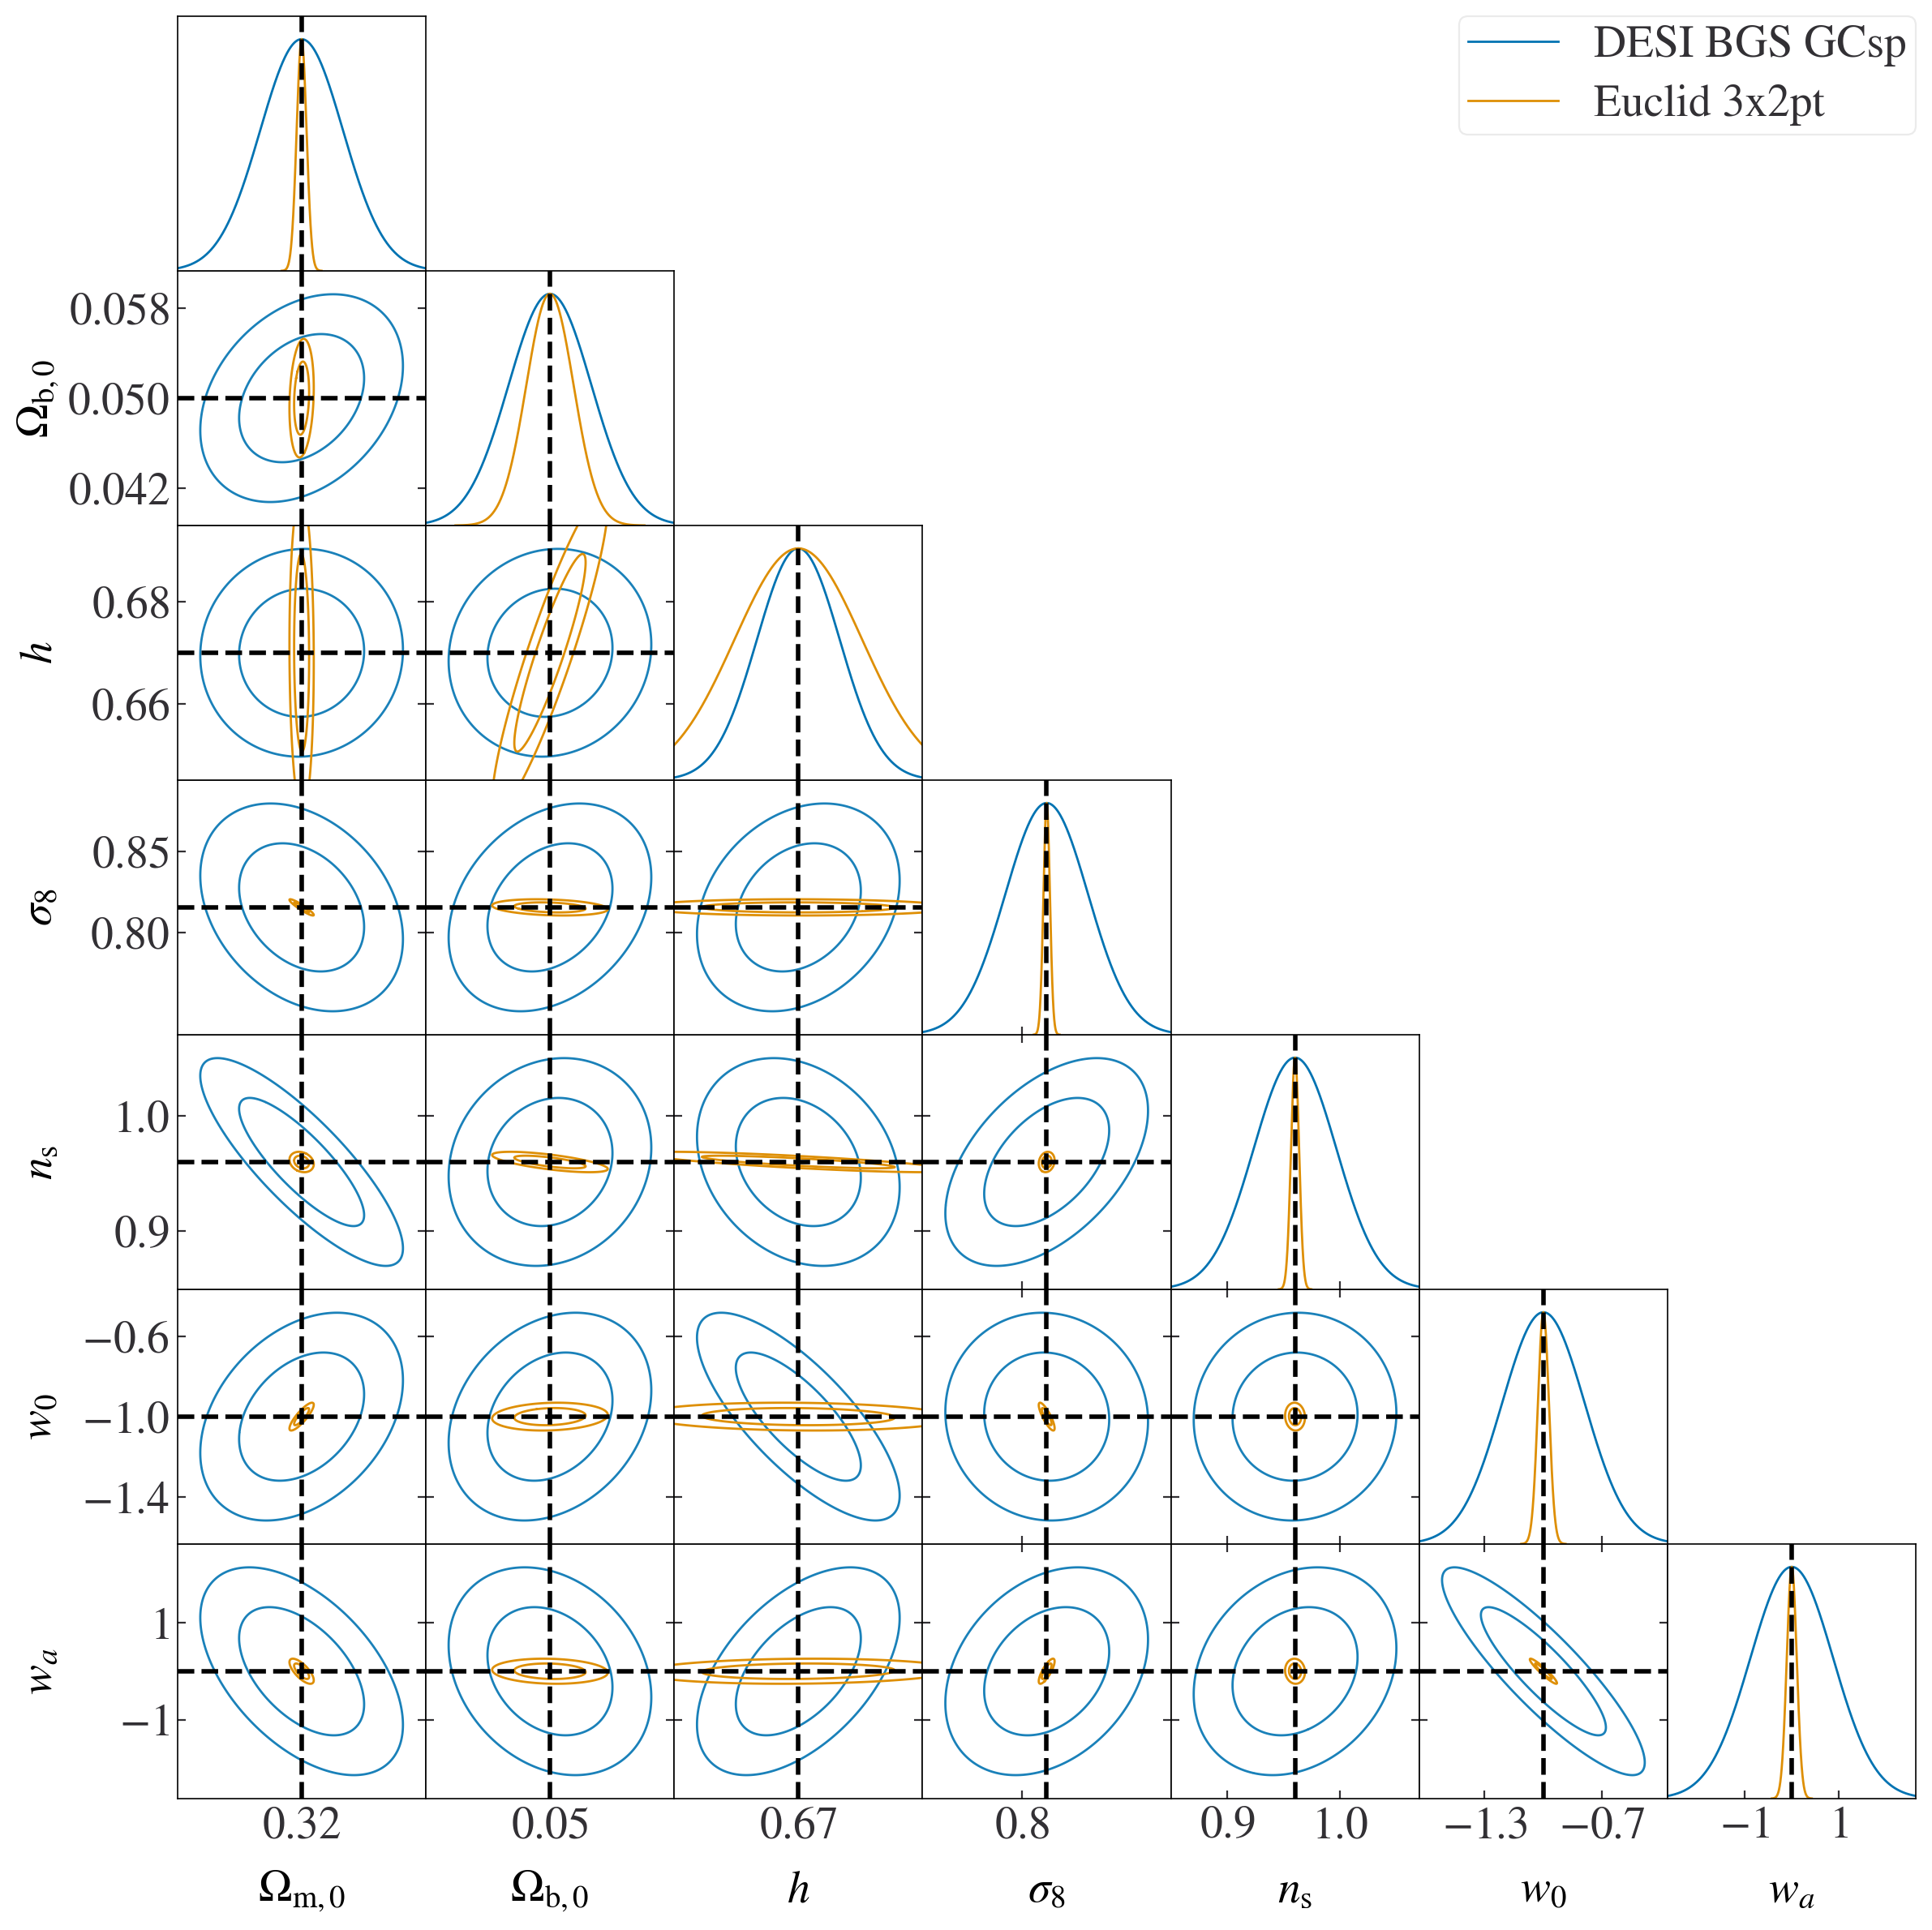

In [15]:
plot_options = {'fishers_list': Fishers_list, 
                'colors': snscolors,
                'fish_labels': ['DESI BGS GCsp','Euclid 3x2pt'],
                'filled': False,
                'plot_pars': cosmopars,
                'axis_custom_factors': {'all':3},  ## Axis limits cover 3-sigma bounds of first Fisher matrix
                'plot_method': 'Gaussian',
                'file_format': '.pdf',   ##file format for all the plots
                'outpath' : './plots/',  ## directory where to store the files, if non-existent, it will be created
                'outroot':'Euclid-photo_DESI-spectro_comparasion_w0waCDM'  ## file name root for all the plots, extra names can be added individually
                } 

fish_plotter = fpp.fisher_plotting(**plot_options)
#fish_plotter.load_gaussians()
fish_plotter.plot_fisher(filled=False)

to fix them use <fo.reshuffle> 

If you want to fix a (cosmological) parameter in retrospect remember to do it before margenalisation

./plots  exists already
Fisher matrix loaded, label name:  DESI ELG GCsp
Fisher matrix loaded, label name:  Rubin 3x2pt
---> Fisher matrix name:  DESI ELG GCsp
Fisher matrix fiducials: 
 [ 0.32      0.05      0.67      0.815584  0.96     -1.        0.      ]
Fisher matrix 1-sigma bounds: 
 [0.00479782 0.00159849 0.00153    0.00766247 0.00966477 0.04352704
 0.20014955]
Fisher matrix param names: 
 ['Omegam', 'Omegab', 'h', 'sigma8', 'ns', 'w0', 'wa']
Fisher matrix param names latex: 
 ['\\Omega_{{\\rm m}, 0}', '\\Omega_{{\\rm b}, 0}', 'h', '\\sigma_8', 'n_{\\rm s}', 'w_0', 'w_a']
---> Fisher matrix name:  Rubin 3x2pt
Fisher matrix fiducials: 
 [ 0.32      0.05      0.67      0.815584  0.96     -1.        0.      ]
Fisher matrix 1-sigma bounds: 
 [0.00151023 0.00232285 0.01376179 0.00150647 0.0038711  0.01754054
 0.05543025]
Fisher matrix param names: 
 ['Omegam', 'Omegab', 'h', 'sigma8', 'ns', 'w0', 'wa']
Fisher matrix param names latex: 
 ['\\Omega_{{\\rm m}, 0}', '\\Omega_{{\\rm b}, 0

/home/sefa/Schreibtisch/cosmicfish_release/cosmicfish_environment/lib/python3.9/site-packages/cosmicfishpie-0.1.dev370+g168c171.d20231124-py3.9.egg/cosmicfishpie/analysis/fisher_plotting.py:253: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  g.fig.savefig(os.path.join(self.options['outpath'],self.options['outroot']+contstr+format_), dpi=dpi_, bbox_inches='tight')
/home/sefa/Schreibtisch/cosmicfish_release/cosmicfish_environment/lib/python3.9/site-packages/IPython/core/events.py:93: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  func(*args, **kwargs)
/home/sefa/Schreibtisch/cosmicfish_release/cosmicfish_environment/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


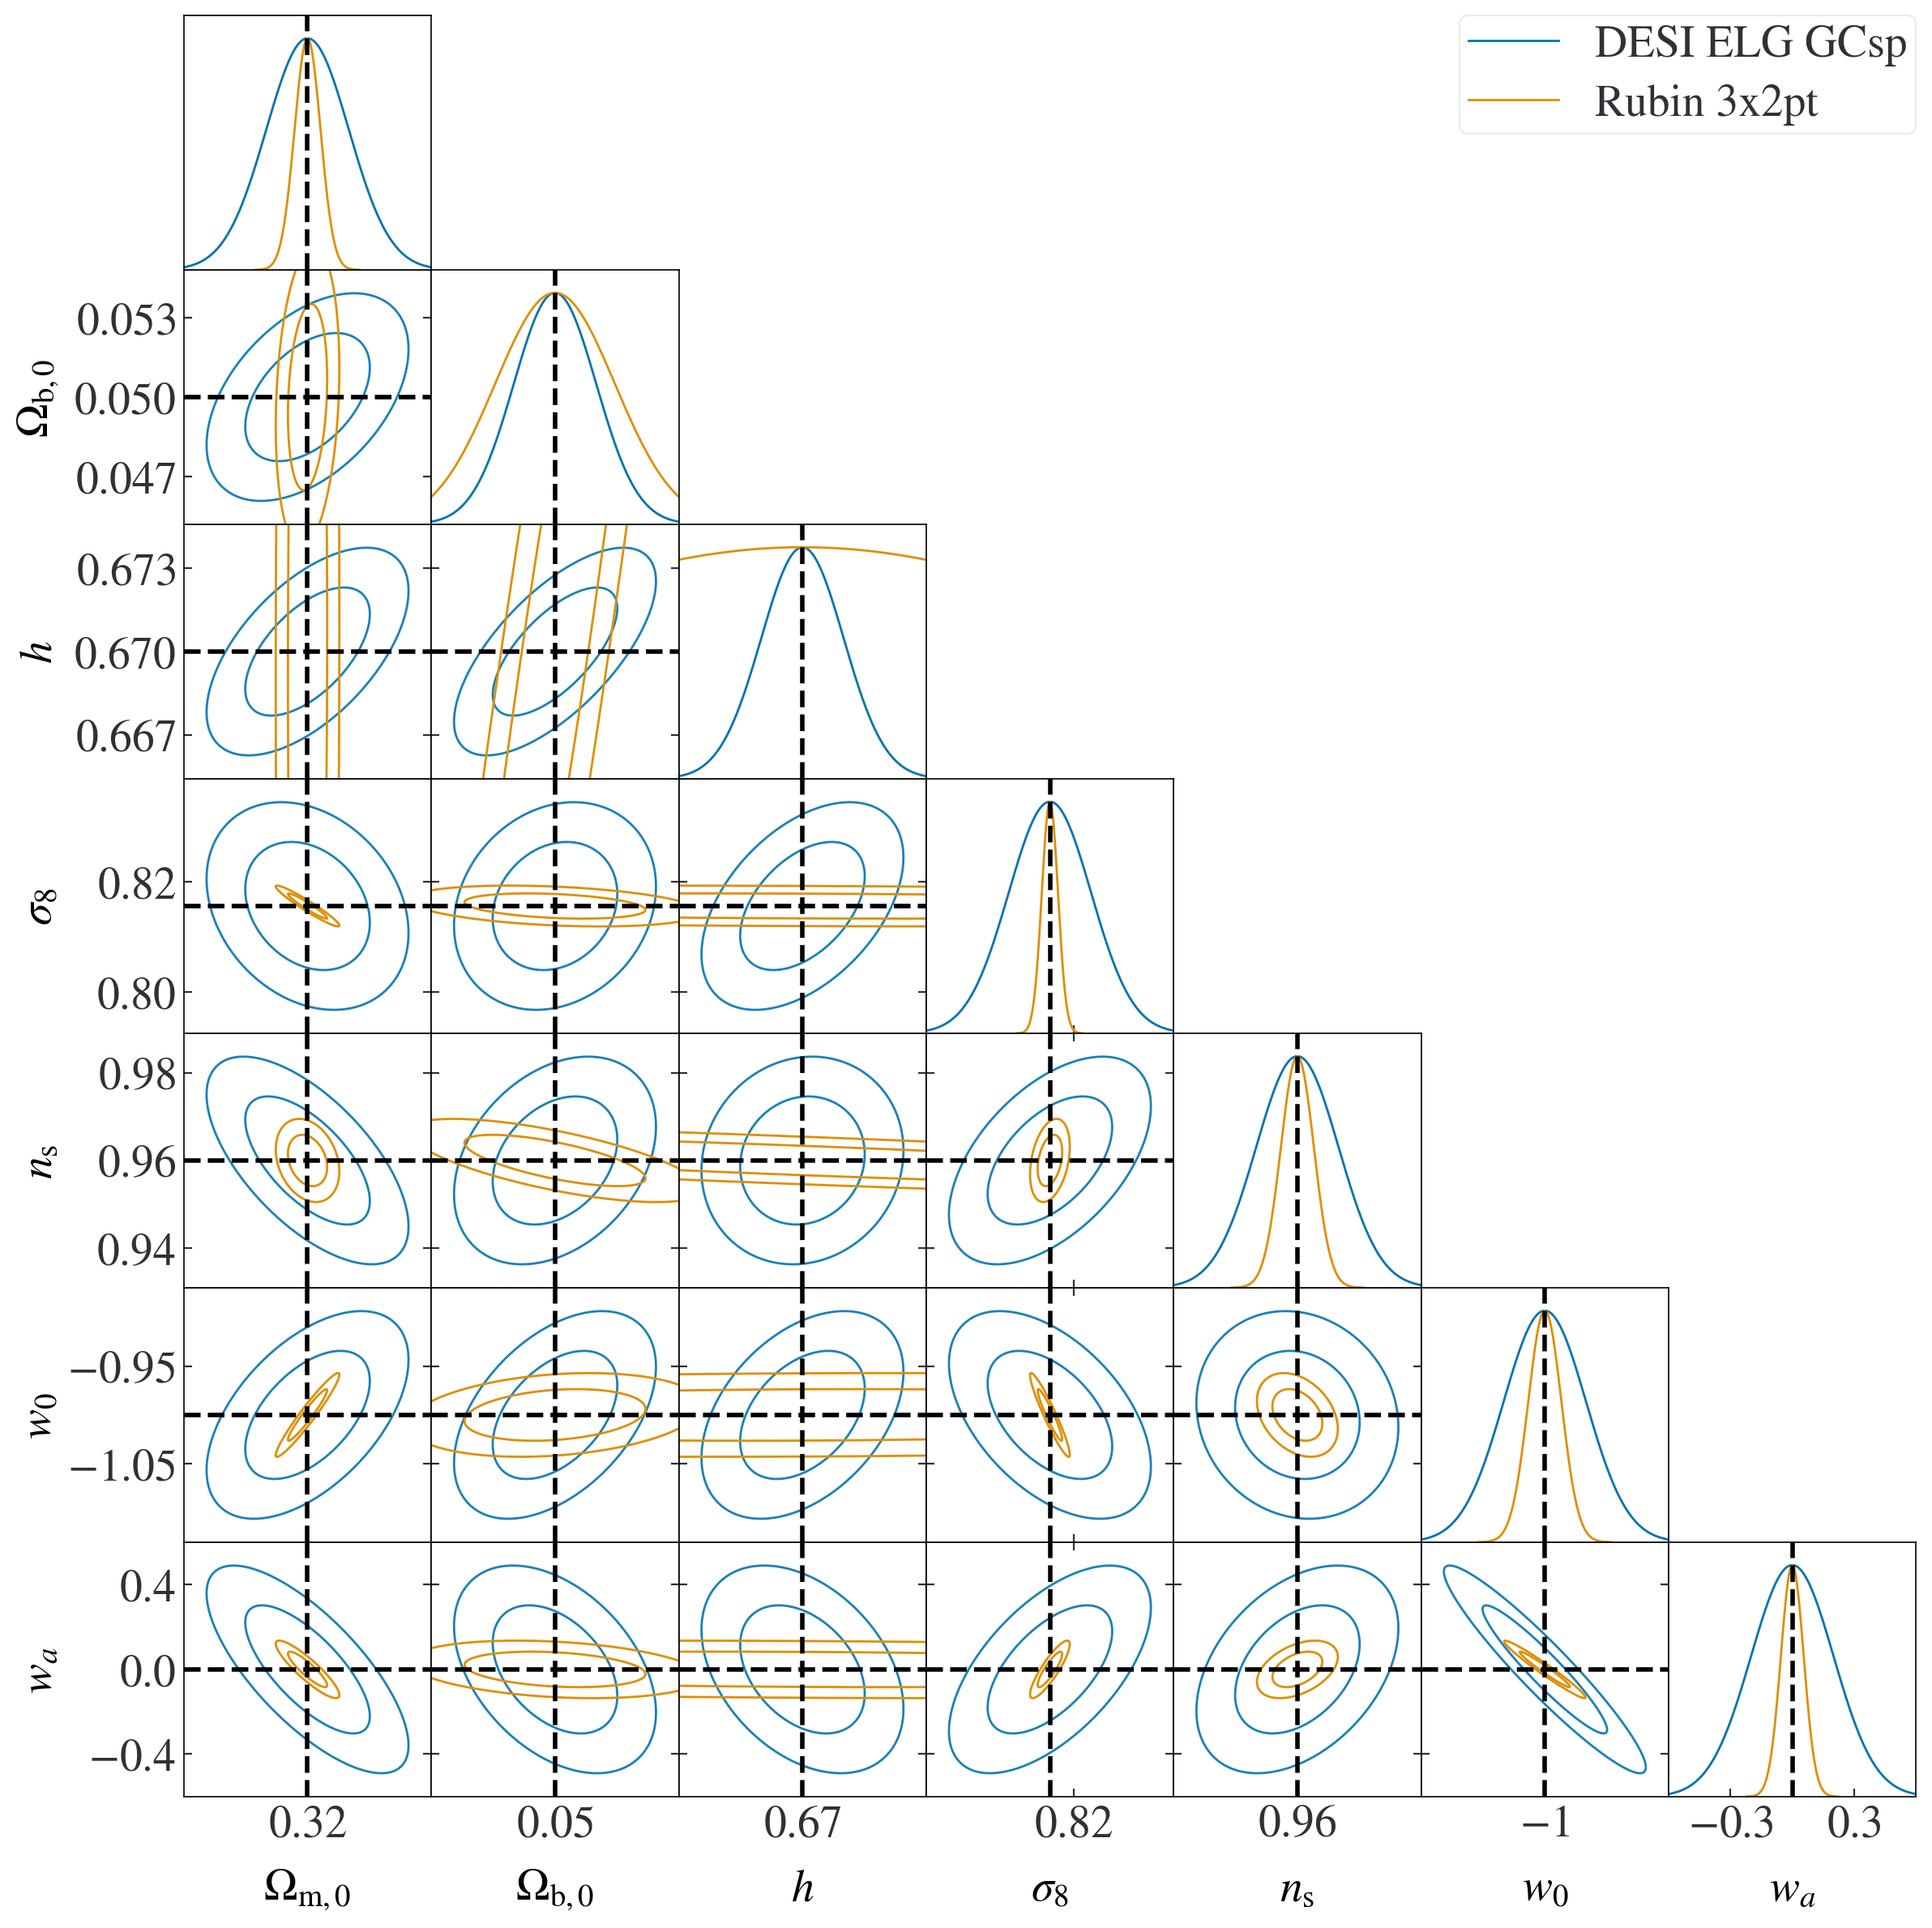

In [16]:
Fishers_list = [fm.fisher_matrix(file_name='./results/CosmicFish_v1.0_w0waCDM_external_Camb-DP_DESI_ELG_GCsp_fishermatrix.txt'),
    fm.fisher_matrix(file_name='./results/CosmicFish_v1.0_w0waCDM_external_Camb-DP_Rubin-Optimistic_WLGCph_fishermatrix.txt')
              ]

#pick out the cosmopars 
cosmopars = ['Omegam','Omegab','h','sigma8','ns','w0','wa'] 

#fix the nuicance parameters
Fishers_list = [fo.reshuffle(fish,cosmopars) for fish in Fishers_list]

plot_options = {'fishers_list': Fishers_list, 
                'colors': snscolors,
                'fish_labels': ['DESI ELG GCsp','Rubin 3x2pt'],
                'filled': False,
                'plot_pars': cosmopars,
                'axis_custom_factors': {'all':3},  ## Axis limits cover 3-sigma bounds of first Fisher matrix
                'plot_method': 'Gaussian',
                'file_format': '.pdf',   ##file format for all the plots
                'outpath' : './plots/',  ## directory where to store the files, if non-existent, it will be created
                'outroot':'Rubin-photo_DESI-spectro_comparasion_w0waCDM'  ## file name root for all the plots, extra names can be added individually
                } 

fish_plotter = fpp.fisher_plotting(**plot_options)
#fish_plotter.load_gaussians()
fish_plotter.plot_fisher(filled=False)